#Linea de espera

El programa simula una linea de espera con tiempos de llegada que siguen una distribución general y tambien distribuciones de tiempos de servicio generales, con un solo servidor.

$$G/G/1$$

Tambien se puede simular para llegdas Markovianas y tiempo de servicio Markoviano para comprobar los resultados con las formulas. ***M/M/1***

Si $\mu>\lambda$ entonces:

$$P_0=1-\dfrac{\lambda}{\mu}$$
$$L_s=\dfrac{\lambda}{\mu-\lambda}$$
$$W_s=\dfrac{1}{\mu-\lambda}$$
$$W_q=\dfrac{\lambda}{\mu(\mu-\lambda)}$$

In [2]:
from random import *
from random import expovariate as expo
import numpy as np
import pandas as pd

def lineaE(n):
	t0 = 0
	s = 0 # total de clientes en la fila
	k = 0 # indice
	datos = np.zeros( (n,10) , np.float32)
	encabezados = [
'cliente',
'tiempo de interllegada',
'tiempo de llegada',
'clientes en espera',
'inicio del servicio',
'tiempo de servicio',
'fin del servicio',
'tiempo en el sistema',
'tiempo promedio en el sistema',
'tiempo de espera en la fila']
	for i in range(n):
		# numero de cliente
		datos[i][0] = i + 1

		# tiempo entre llegadas
		t = expo(1/5) # distribucion de llegadas
		datos[i][1] = t

		# tiempo de llegada
		if i == 0:
			t0 = t
			datos[i][2] = t0
		else:
			t0 += t
			datos[i][2] = t0

		# clientes en espera
		if i == 0:
			datos[i][3] = s
		elif t0 < datos[k][6]:
			s += 1
			datos[i][3] = s
		elif t0 > datos[k][6]:
			w = datos[k:i,6][(datos[k:i,6] < datos[i][2])].size
			s = datos[k:i,6].size - w
			k += w # se actualiza el indice
			datos[i][3] = s

		# inicio del servicio
		if i==0:
			datos[i][4] = t
		else:
			datos[i][4] = max( datos[i-1][6] , t0 )

		# distribucion del tiempo de servicio
		u = expo(1/4)
		datos[i][5] = u

		# fin del servicio
		datos[i][6] = datos[i][4] + u

		# tiempo en el sistema
		datos[i][7] = datos[i][6] - t0

		# tiempo promedio en el sistema
		if i == 0:
			datos[i][8] = datos[i][6]
		else:
			datos[i][8] = datos[0:i,7].mean()

	 # tiempo de espera en la fila
		if i == 0:
			datos[i][9] = 0
		else:
			datos[i][9] = datos[i][4] - datos[i][2]

	return pd.DataFrame( np.round(datos,2) , columns = encabezados).astype({
'cliente':np.uint32,
'tiempo de interllegada':np.float32,
'tiempo de llegada':np.float32,
'clientes en espera':np.uint16,
'inicio del servicio':np.float32,
'tiempo de servicio':np.float32,
'fin del servicio':np.float32,
'tiempo en el sistema':np.float32,
'tiempo promedio en el sistema':np.float32,
'tiempo de espera en la fila':np.float32})

simu = lineaE(60).style.hide( axis = "index" ).format( precision = 2 )
simu

cliente,tiempo de interllegada,tiempo de llegada,clientes en espera,inicio del servicio,tiempo de servicio,fin del servicio,tiempo en el sistema,tiempo promedio en el sistema,tiempo de espera en la fila
1,10.75,10.75,0,10.75,1.76,12.51,1.76,12.51,0.00
2,3.19,13.95,0,13.95,4.71,18.66,4.71,1.76,0.00
3,2.56,16.51,1,18.66,2.93,21.59,5.08,3.23,2.15
4,11.46,27.97,0,27.97,7.39,35.36,7.39,3.85,0.00
5,13.54,41.51,0,41.51,13.78,55.29,13.78,4.74,0.00
6,3.15,44.66,1,55.29,5.11,60.41,15.75,6.55,10.63
7,3.09,47.75,2,60.41,2.23,62.64,14.89,8.08,12.66
8,9.07,56.82,2,62.64,0.19,62.84,6.02,9.05,5.82
9,3.55,60.37,3,62.84,3.43,66.27,5.90,8.67,2.47
10,3.30,63.66,1,66.27,2.68,68.95,5.28,8.36,2.60


In [3]:
k = 100000

simu2 = lineaE(k)

A = [simu2['clientes en espera'].mean() ,
     0,
     simu2["clientes en espera"][(simu2["clientes en espera"]==0)].size/k ,
     simu2['tiempo en el sistema'].mean() ,
     simu2['tiempo de espera en la fila'].mean() ]

pd.Series(A,index=
 ["Clientes en el sistema:",
  "Clientes promedio en la fila",
  "Probabilidad de cero clientes en la fila:",
  "Tiempo promedio en el sistema:",
  "Tiempo esperado en la fila:"],
dtype = np.float32)

,0
Clientes en el sistema:,3.998650
Clientes promedio en la fila,0.000000
Probabilidad de cero clientes en la fila:,0.199350
Tiempo promedio en el sistema:,19.957426
Tiempo esperado en la fila:,15.968287


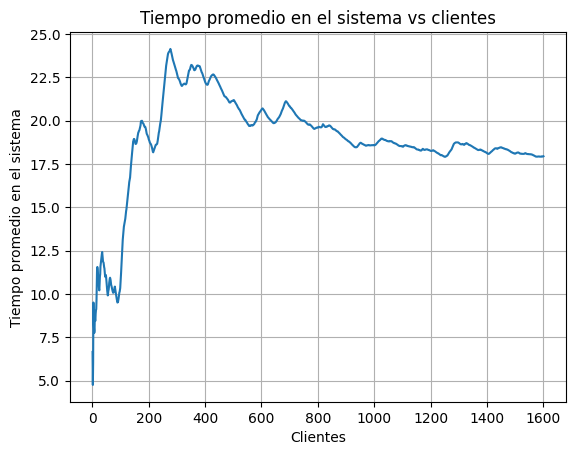

In [4]:
import matplotlib.pyplot as plt

simu1 = lineaE(1600)

plt.plot(simu1["cliente"],simu1["tiempo promedio en el sistema"])
plt.grid()
plt.xlabel("Clientes")
plt.ylabel("Tiempo promedio en el sistema")
plt.title("Tiempo promedio en el sistema vs clientes")
plt.show()

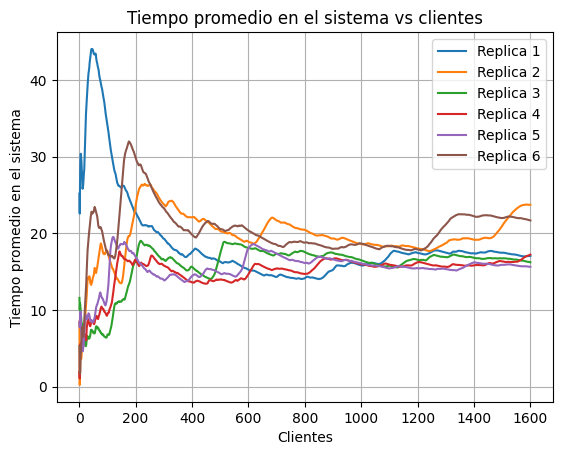

In [5]:
import matplotlib.pyplot as plt

for i in range(6):
  replica = lineaE(1600)
  plt.plot(replica["cliente"],replica["tiempo promedio en el sistema"],label=f"Replica {i+1}")

plt.legend(loc="upper right")

plt.grid()
plt.xlabel("Clientes")
plt.ylabel("Tiempo promedio en el sistema")
plt.title("Tiempo promedio en el sistema vs clientes")
plt.show()

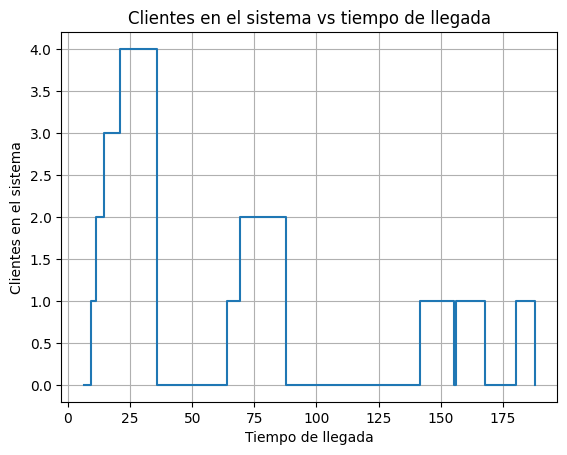

In [6]:
import matplotlib.pyplot as plt

simu3 = lineaE(30)

plt.step(simu3["tiempo de llegada"],simu3["clientes en espera"],where="post")
plt.grid()
plt.xlabel("Tiempo de llegada")
plt.ylabel("Clientes en el sistema")
plt.title("Clientes en el sistema vs tiempo de llegada")
plt.show()